# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

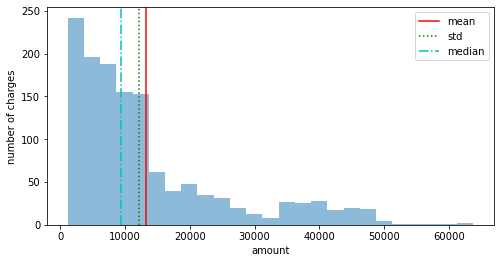

In [4]:
plt.figure(figsize=(8,4))
plt.hist(medical.charges, bins=25, alpha=0.5)
plt.axvline(medical.charges.mean(), label = 'mean', c = 'r', linestyle='-')
plt.axvline(medical.charges.std(), label = 'std', c = 'g', linestyle=':')
plt.axvline(medical.charges.median(), label = 'median', c = 'c', linestyle='-.')
plt.xlabel("amount")
plt.ylabel("number of charges")
plt.legend();

In [5]:
medical.charges.mean() , medical.charges.std()

(13270.422265141257, 12110.011236693994)

The plot shows that we are dealing with an asymetrical spread of the data, most of the charges are clustered on the left. while the largest charge amounts are spred in the lower end of the distribution.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The dataset is a result of a random sampling from the hostpital, and based in the Central Limit Theorem we can state that, this random samples tend to represent the big population and should have similiar parameters.<br>
The main concern is that the average population of charges has fallen below a given threadshold, one apropriate approach to answer this concerns is by using the t-test. The Null hypothesis can be:<br>
N$_0$= `The average population of charges is bigger or equal to $12 000`
___

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The null hypothesis and the alternative are as follows:

H$_0$: `The average charge is 12,000 or higher.`
<br>
H$_A$: `The average charge is below 12,000.`

Since the null hypothesis implies only one direction (higher) the test should me one-tailed

In [6]:
#calculate the parameters of the sample and assign the variables
sample_mean = np.mean(medical.charges)
sample_std = np.std(medical.charges)
sample_size = len(medical.charges)
alpha = 0.95

# calculate the standard error
standard_error = sample_std / np.sqrt(sample_size)

# calculate the critical value
t_score = t.ppf(alpha, df = sample_size - 1)

# margin of error
margin_of_error = t_score * standard_error

# find the lower end of the mean
sample_mean - margin_of_error

12725.690859802164

The 95% confidence interval suggests that the lowest of mean charges tends to be approximately 12,725. <br>Therefore, the administrator should be confident that in 95% of cases, the average of charges will not fall below \$12,000.
___

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Plotting the two group of charges could lead us to a better insight: 

In [7]:
# separate the charges based on insurance
insurance = medical[medical.insuranceclaim == 1].charges
no_insurance = medical[medical.insuranceclaim == 0].charges

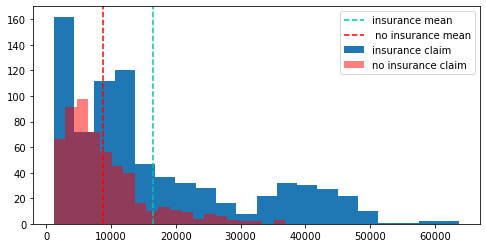

In [8]:
plt.figure(figsize=(8,4))
plt.hist(insurance, bins = 20, label='insurance claim')
plt.hist(no_insurance, bins=20, label = 'no insurance claim', alpha = 0.5, color='r')
plt.axvline(np.mean(insurance), label="insurance mean", c='c', linestyle = '--')
plt.axvline(np.mean(no_insurance), label=" no insurance mean", c = 'r', linestyle = '--')
plt.legend();

The mean charges of people without insurance seem to be smaller, but the sample size also appears to be smaller. Perhaps the smaller sample size for people without insurance leads to a less accurate estimates about the population. The group of people with insurance has charges with a longer tail, meaning they have more charges with larger amounts than people without insurance. This does affect the difference between the means of the two groups.

The null Hypothesis and Alternative Hypothesis:<br>
H$_0$ : `There is no diference in the amount charged between people with insurance and without insurance`<br>
H$_A$ : `The people with insurance are charged more than people without insurance`

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 


In [9]:
# calculate the parameters for insurance claimed charged
insurance_mean = np.mean(insurance)
insurance_std = np.std(insurance, ddof=1)
insurance_size = len(insurance)

# calculate the parameters for charges without insurance
no_insurance_mean = np.mean(no_insurance)
no_insurance_std = np.std(no_insurance, ddof=1)
no_insurance_size = len(no_insurance)

In [10]:
# calculate the standard deviation of the two groups
sp = np.sqrt( (((insurance_size - 1) * insurance_std**2 ) + ( (no_insurance_size - 1) * no_insurance_std**2 ))
            / ( insurance_size + no_insurance_size - 2))
sp

11520.034268775256

In [11]:
#calculatete the t manually using the above formula
t_manual = (insurance_mean - no_insurance_mean) / (sp * np.sqrt( (1/insurance_size) + (1/no_insurance_size) )) 
t_manual

11.89329903087671

Using `ttest_ind()` function from  scippy.stats:

In [12]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(insurance, no_insurance)
t_statistic, p_value

(11.893299030876712, 4.461230231620717e-31)

In [13]:
t_manual , t_statistic, round(t_manual,5) == round(t_statistic,5)

(11.89329903087671, 11.893299030876712, True)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ The t-test is generally used when sample size is small and the population parameters are unknown, instead they are estimated from the sample. In contrast, the z-score is used when we have the true population parameters and a large sample size. In real-world scenarios, it is very rare to have the true parameters of a population, and having these parameters for two populations is very unlikely. Therefore, using the Z-score in real-world situations is not most practical approach.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test